In [23]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *


In [24]:
import pandas as pd
csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)


funcdict = {
        'add' : 5,
        'sub' : 5,
        'mul' : 4,
        'div' : 4,
        'inv' : 2,
        'log' : 3,
        'max' : 0,
        'min' : 0,
        'sqrt' : 1,
        'exp' : 1,
        'floor': 0
}

(10900,)
(10900,)


In [25]:
gp = GP(M=500,
        max_depth=50,
        prob_node_symb=0.5,
        func_list=list(funcdict.keys()),
        depth_penalty=0.005,
        elitism=0.1,
        const_range=(0,2))

res = gp.execute(x,y, generations=100)
res

/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: invalid value encountered in subtract
  return self.operator(*args)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/gp.py:11: RuntimeWarning: overflow encountered in power
  return np.average(np.power(y-y_pred,2), weights=w)
Progress:  91%

{'total_generations': 100,
 'best_trees': array([Node(div), Node(div), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min),
        Node(min), Node(min), Node(min), Node(min), Node(min), Node(min

min(div(x,add(log(add(log(mul(mul(mul(x,x),max(x,x)),max(x,add(add(log(x),0.15534863358519768),mul(log(x),max(0.7744289706134182,mul(0.4796476516664596,max(0.7744289706134182,x)))))))),add(add(log(x),sqrt(0.7447875824848782)),mul(0.4750987784666991,max(1.6950371811925498,mul(0.4796476516664596,x)))))),sqrt(0.15534863358519768))),add(add(log(x),0.15534863358519768),mul(log(x),max(0.7744289706134182,mul(0.4796476516664596,max(0.7744289706134182,x))))))


Text(0, 0.5, 'Depth')

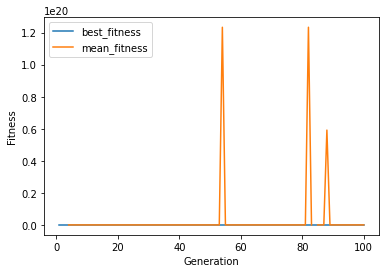

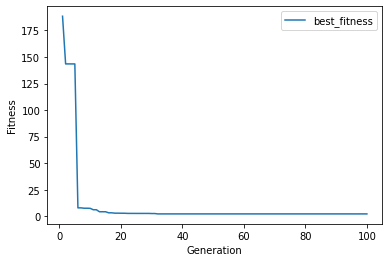

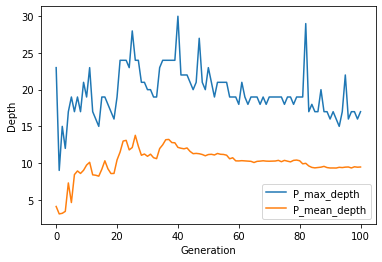

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
#plt.ylim(0,res['mean_fitness'][5])
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Fitness')


plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Fitness')



plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.legend()
print(res['best_trees'][-1])
plt.xlabel('Generation')
plt.ylabel('Depth')

In [27]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness p:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.183139257786464
best fitness p:	2.2814085909956754


In [28]:
res['best_trees'][-1].pprint()


     ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________min_______________________________
    /                                                                                                                                                                                                                                                                                                                                          \
  div___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________                                          ____________

In [29]:
res['best_trees'][-1]